#### Question C) Use the Income Classification dataset from below Kaggle link and create an end to end project on Jupyter/Colab.

https://www.kaggle.com/datasets/lodetomasi1995/income-classification/data

- ** i.	Download the dataset from above link and load it into your Python environment. **
- ** ii.	Perform the EDA and do the visualizations.
- ** iii.	Check the distributions/skewness in the variables and do the transformations if required.
- ** iv.	Check/Treat the outliers and do the feature scaling if required.
- ** v.	Create a ML model to predict the life expectancy based on the specifications given.
- ** vi.	Check for overfitting and treat them accordingly.
- ** vii.	Use all the Supervised ML algorithms (DT, RF, SVM, XGBoost etc.) and compare the performances to get the best model.


<div>    
    <span style="color: #6abad2; font-size: 18px; font-weight: bold;">Income Classification:(Data Set) Overview:</span>
</div>
<div>
    <span style="color: #2E8B57;">Column Names: age, workclass, fnlwgt, education, education-num, marital-status, occupation, relationship, race, sex, capital-gain, capital-loss, hours-per-week, native-country, income. </br>
Data Types: </br>
Numeric: age, fnlwgt, education-num, capital-gain, capital-loss, hours-per-week
Categorical: workclass, education, marital-status, occupation, relationship, race, sex, native-country, income
    
</span>
</div>

### Income Classification

In [9]:
import pandas as pd
import numpy as np
# Load dataset
df_original = pd.read_csv(r'income_evaluation.csv')

In [10]:
### Truncate Leaft Right spaces of Feature name 
df_original.columns = df_original.columns.str.strip()

In [11]:
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [12]:
total_nulls = df_original.isnull().sum().sum() 
print(f"Total null values are: {total_nulls}")

Total null values are: 0


#### Check Class imbalancing of Target Feature : income

income
 <=50K    24720
 >50K      7841
Name: count, dtype: int64


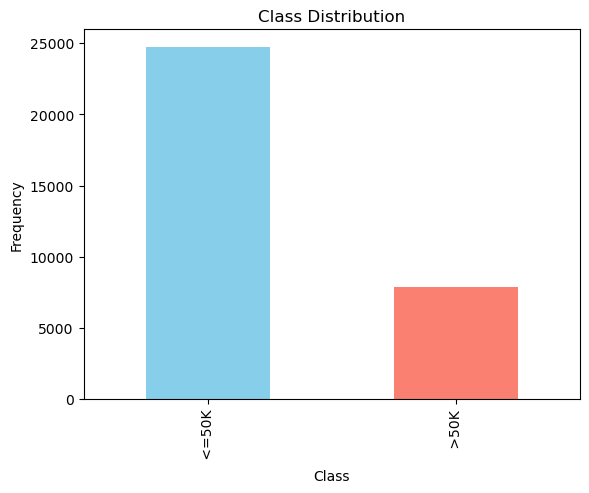

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
target_column = 'income'
class_counts = df_original[target_column].value_counts()
# Display the class distribution
print(class_counts)
# Plot the class distribution
class_counts.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()


### Minority class : Upsampling => there is class imbalancing 

In [15]:
import pandas as pd
from sklearn.utils import resample
df_original['income'] = df_original['income'].str.strip()
df = df_original.copy()
target_feature = 'income'
# Separate majority and minority classes
df_majority = df[df['income'] == '<=50K']
df_minority = df[df[target_feature] == '>50K']
# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=len(df_majority),    # to match majority class
                                 random_state=42) # reproducible results

# Combine majority class with upsampled minority class
df_final = pd.concat([df_majority, df_minority_upsampled])

# Shuffle the final dataset
df_final = df_final.sample(frac=1, random_state=42).reset_index(drop=True)
# Display the final class distribution
print(df_final[target_feature].value_counts())

income
>50K     24720
<=50K    24720
Name: count, dtype: int64


income
>50K     24720
<=50K    24720
Name: count, dtype: int64


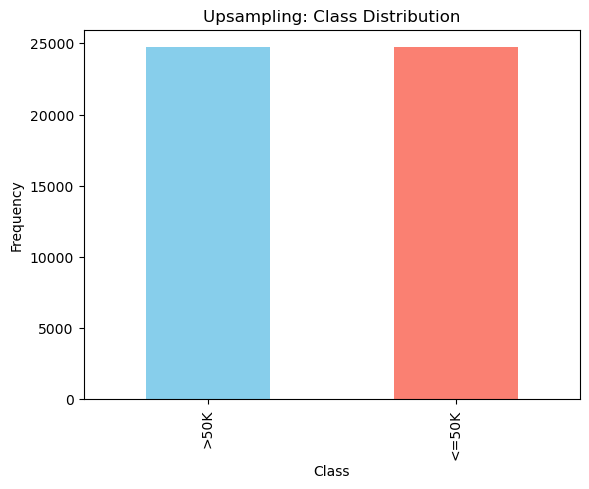

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
target_column = 'income'
class_counts = df_final[target_column].value_counts()
# Display the class distribution
print(class_counts)
# Plot the class distribution
class_counts.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Upsampling: Class Distribution')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()


### Label encoding all required features.

In [17]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
df_encode = df_final.copy()
# Trim spaces from all string columns
df_encode = df_encode.apply(lambda x: x.str.strip() if x.dtype == "object" else x)
# Identify categorical columns
categorical_columns = df_encode.select_dtypes(include=['object']).columns
# Initialize the label encoder
label_encoders = {col: LabelEncoder() for col in categorical_columns}
# Apply label encoding to each categorical column
for col in categorical_columns:
    df_encode[col] = label_encoders[col].fit_transform(df_encode[col])
# Display the first few rows of the encoded dataset
print(df_encode.head(5))

   age  workclass  fnlwgt  education  education-num  marital-status  \
0   35          4  953588         11              9               2   
1   36          4  150042          9             13               0   
2   36          6   37778         12             14               2   
3   40          5  102226         11              9               2   
4   61          4  162397          9             13               2   

   occupation  relationship  race  sex  capital-gain  capital-loss  \
0           4             5     4    0             0             0   
1          10             3     4    0             0             0   
2           5             0     4    1             0             0   
3           4             0     4    1             0             0   
4          12             0     4    1             0             0   

   hours-per-week  native-country  income  
0              40              39       1  
1              40              39       0  
2              70   

#### Check Features min values : How much far values each others 

In [18]:
print("===== Minimum values ======= ")
print(df_encode.min())
print("===== Maximum values ======= ")
print(df_encode.max())

===== Minimum values ======= 
age                  17
workclass             0
fnlwgt            12285
education             0
education-num         1
marital-status        0
occupation            0
relationship          0
race                  0
sex                   0
capital-gain          0
capital-loss          0
hours-per-week        1
native-country        0
income                0
dtype: int64
===== Maximum values ======= 
age                    90
workclass               8
fnlwgt            1484705
education              15
education-num          16
marital-status          6
occupation             14
relationship            5
race                    4
sex                     1
capital-gain        99999
capital-loss         4356
hours-per-week         99
native-country         41
income                  1
dtype: int64


#### Apply Standardization (Z-Score Scaling) : Make all features equivalent in terms of scale.

In [19]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()
# Fit and transform the data
scaled_data = scaler.fit_transform(df_encode)
# Convert the scaled data back to a DataFrame
df_scaled = pd.DataFrame(scaled_data, columns=df.columns)
# Display the first few rows of the scaled dataset
print("==== Display the first few rows of the scaled dataset  ======")
print("================================================================================\n")
print(df_scaled.head(5))
print("====================================================================================")

==== Display the first few rows of the scaled dataset  ======

        age  workclass    fnlwgt  education  education-num  marital-status  \
0 -0.421965   0.058001  7.214798   0.143631      -0.609271       -0.320142   
1 -0.344544   0.058001 -0.376960  -0.416349       0.922407       -1.809609   
2 -0.344544   1.449698 -1.437610   0.423621       1.305326       -0.320142   
3 -0.034861   0.753850 -0.828717   0.143631      -0.609271       -0.320142   
4  1.590975   0.058001 -0.260232  -0.416349       0.922407       -0.320142   

   occupation  relationship      race       sex  capital-gain  capital-loss  \
0   -0.662863      2.322569  0.365828 -1.647066      -0.19418     -0.261603   
1    0.767009      1.099110  0.365828 -1.647066      -0.19418     -0.261603   
2   -0.424551     -0.736080  0.365828  0.607140      -0.19418     -0.261603   
3   -0.662863     -0.736080  0.365828  0.607140      -0.19418     -0.261603   
4    1.243632     -0.736080  0.365828  0.607140      -0.19418     -0.2616

#### Plot the distribution curves for all features.

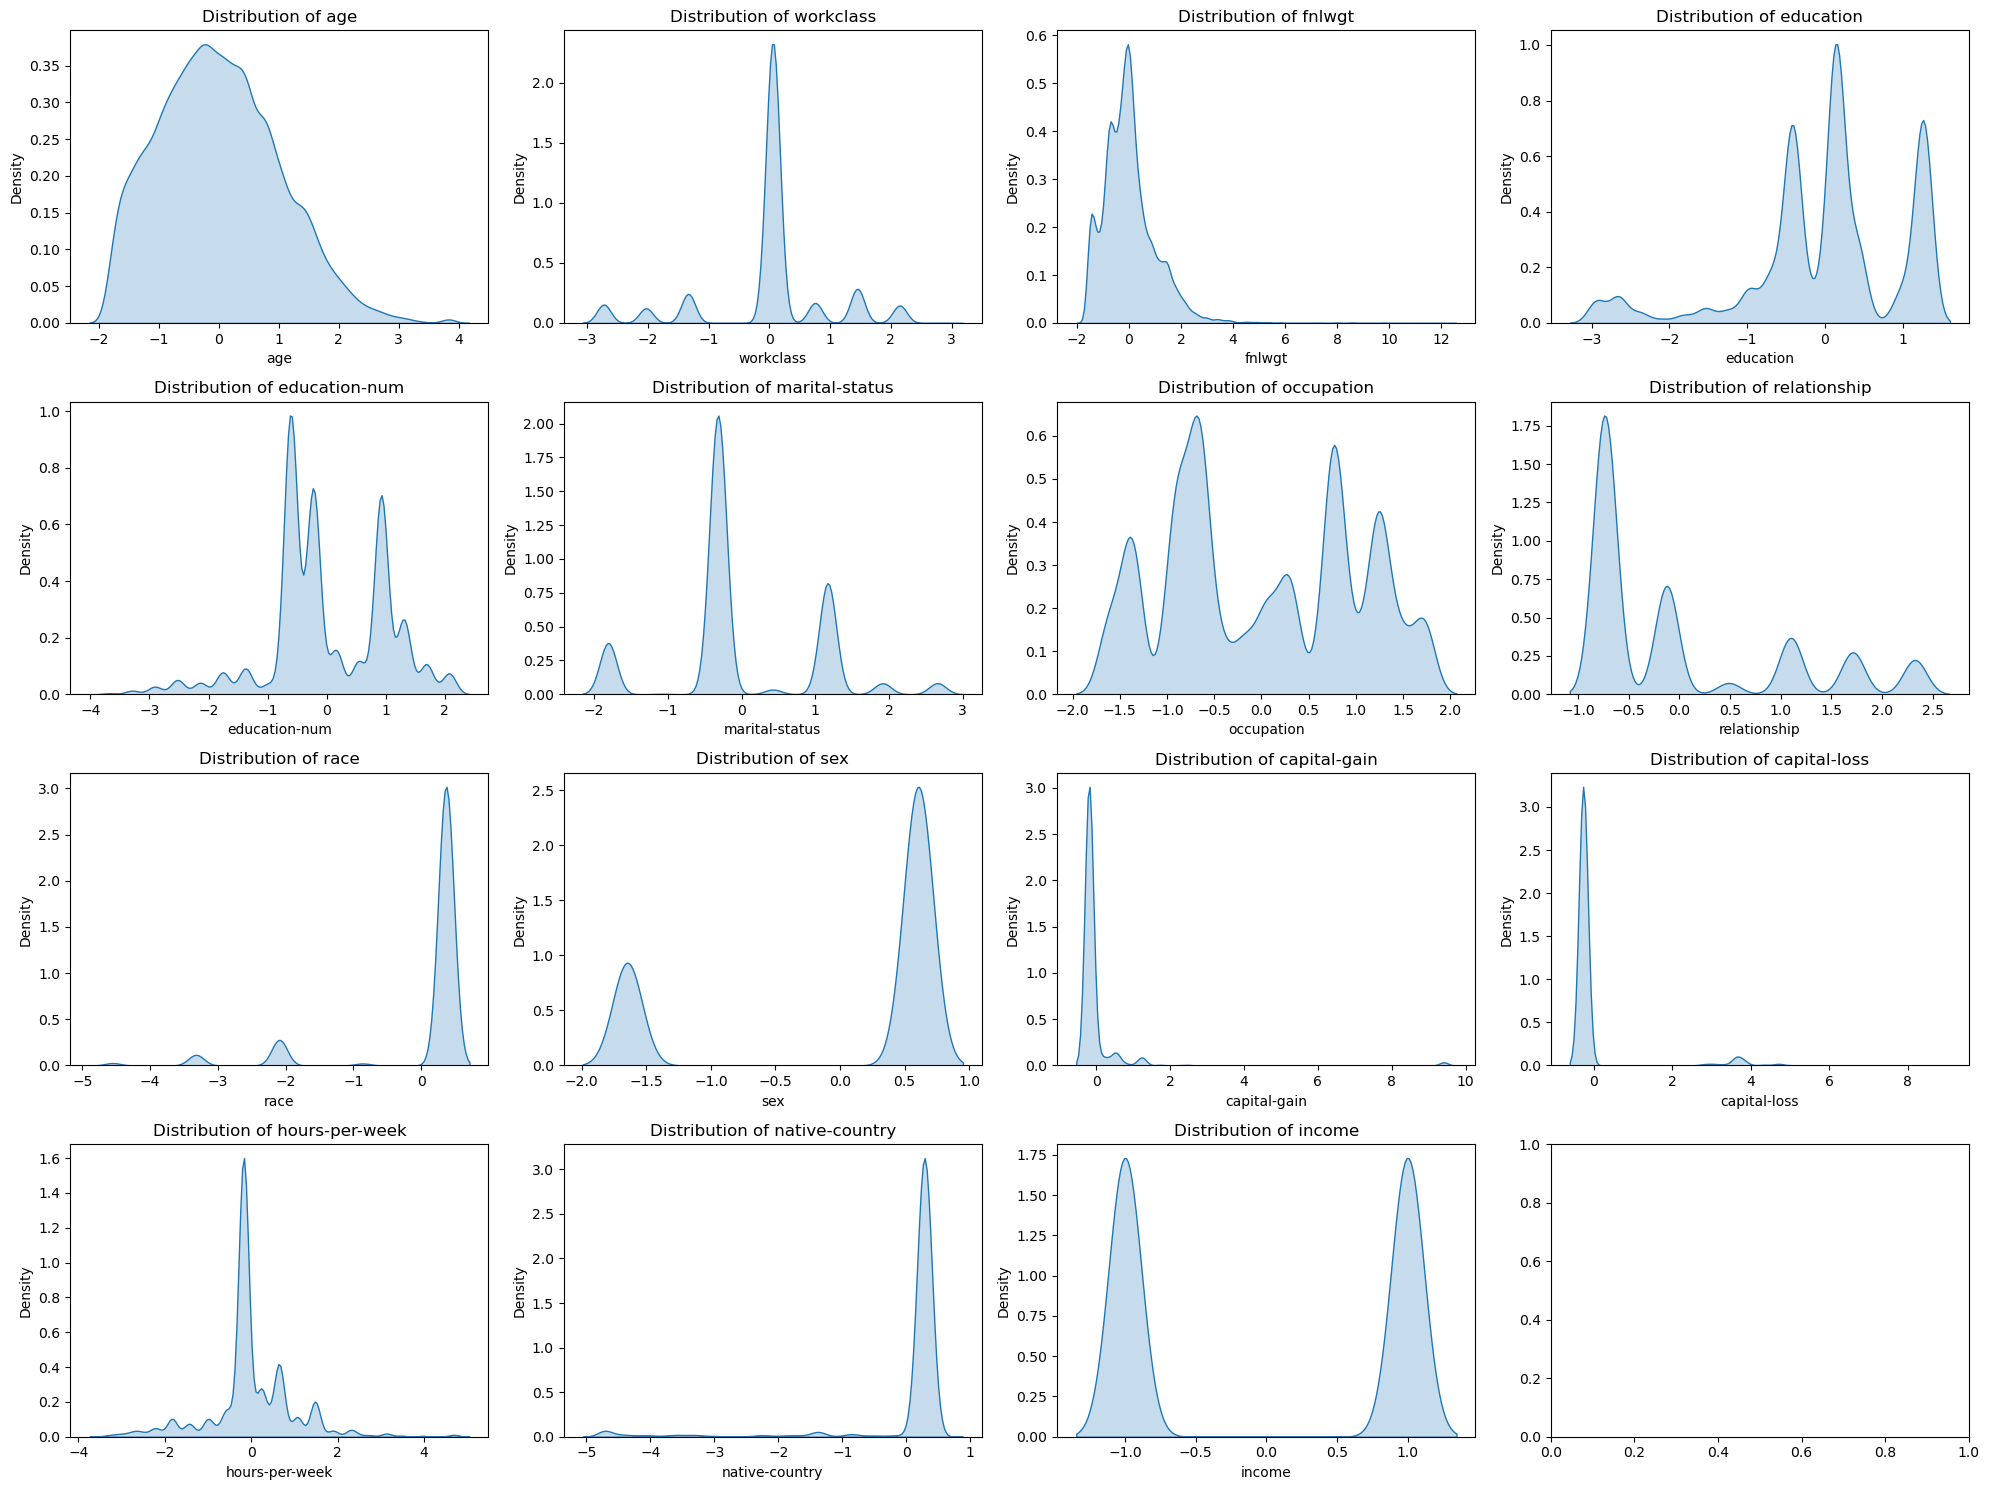

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

features = df_scaled.columns
# Create a figure and axes

fig, axes = plt.subplots(4, 4, figsize=(20, 15))
# Plot each feature
for ax, feature in zip(axes.flatten(), features):
    sns.kdeplot(df_scaled[feature], shade=True, ax=ax)
    ax.set_title(f'Distribution of {feature}')
    ax.set_xlabel(feature)
    ax.set_ylabel('Density')

plt.tight_layout()
plt.show()

In [22]:
print(f"{df_scaled['income'].value_counts()}")
print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")
correlation_matrix = df_scaled.corr()
print(correlation_matrix['income'])

income
 1.0    24720
-1.0    24720
Name: count, dtype: int64
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
age               0.283867
workclass         0.062674
fnlwgt           -0.003776
education         0.101270
education-num     0.381409
marital-status   -0.261425
occupation        0.092582
relationship     -0.287602
race              0.087273
sex               0.267550
capital-gain      0.179897
capital-loss      0.151856
hours-per-week    0.271032
native-country    0.017224
income            1.000000
Name: income, dtype: float64


<div>
    <span style="color: #2E8B57;"> <b>Three features have very weak correlation with target feature. So we can eliminate those features </b>
       </br> Fnlwgt (-0.003776): This near-zero correlation suggests that final weight (fnlwgt) has almost no association with income.
Native-country (0.017224): This very weak positive correlation indicates that the native country has almost no association with income.

Workclass (0.062674): This weak positive correlation suggests that workclass has a slight association with income, but its impact may be minimal.</span>
</div>

##### Relationship against income of : Fnlwgt, Native-country and Workclass

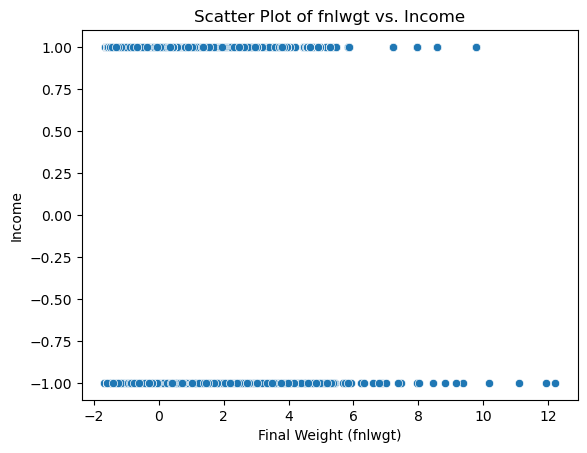

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have a pandas DataFrame named df with 'fnlwgt' and 'income' columns
sns.scatterplot(data=df_scaled, x='fnlwgt', y='income')
plt.title('Scatter Plot of fnlwgt vs. Income')
plt.xlabel('Final Weight (fnlwgt)')
plt.ylabel('Income')
plt.show()


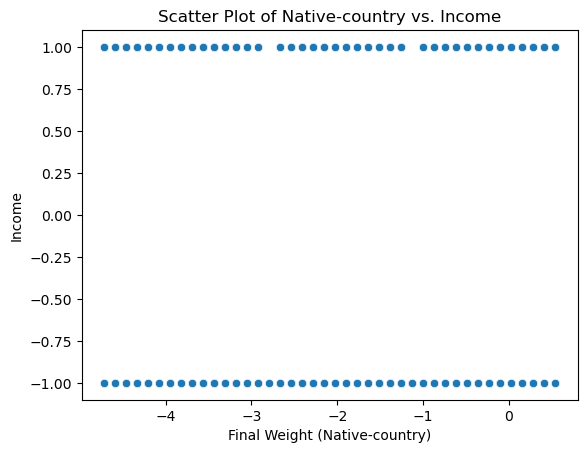

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have a pandas DataFrame named df with 'fnlwgt' and 'income' columns
sns.scatterplot(data=df_scaled, x='native-country', y='income')
plt.title('Scatter Plot of Native-country vs. Income')
plt.xlabel('Final Weight (Native-country)')
plt.ylabel('Income')
plt.show()


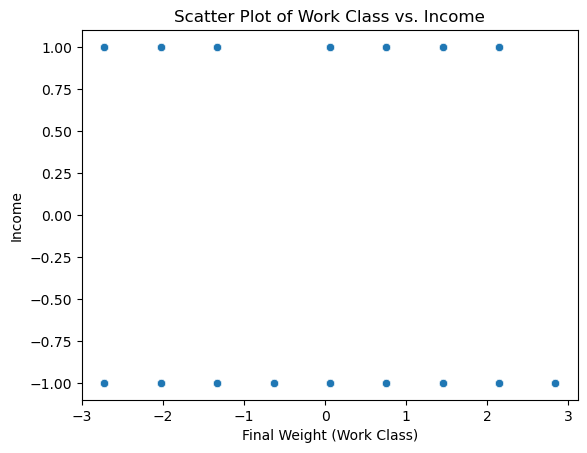

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have a pandas DataFrame named df with 'fnlwgt' and 'income' columns
sns.scatterplot(data=df_scaled, x='workclass', y='income')
plt.title('Scatter Plot of Work Class vs. Income')
plt.xlabel('Final Weight (Work Class)')
plt.ylabel('Income')
plt.show()

#### Eliminate all three features : Fnlwgt, Native-country and Workclass

In [26]:
df_rc = df_scaled.drop(columns=['fnlwgt'])
df_rc = df_rc.drop(columns=['workclass'])
df_rc = df_rc.drop(columns=['native-country'])
df_rc.head(5)

,age,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,income
0,-0.421965,0.143631,-0.609271,-0.320142,-0.662863,2.322569,0.365828,-1.647066,-0.19418,-0.261603,-0.175082,1.0
1,-0.344544,-0.416349,0.922407,-1.809609,0.767009,1.099110,0.365828,-1.647066,-0.19418,-0.261603,-0.175082,-1.0
2,-0.344544,0.423621,1.305326,-0.320142,-0.424551,-0.736080,0.365828,0.607140,-0.19418,-0.261603,2.306827,-1.0
3,-0.034861,0.143631,-0.609271,-0.320142,-0.662863,-0.736080,0.365828,0.607140,-0.19418,-0.261603,-0.175082,-1.0
4,1.590975,-0.416349,0.922407,-0.320142,1.243632,-0.736080,0.365828,0.607140,-0.19418,-0.261603,-0.175082,1.0


#### Applyy Robust scalling 

In [27]:
from sklearn.preprocessing import RobustScaler
# Assuming you have a pandas DataFrame named df with your features
scaler = RobustScaler()
scaled_features = scaler.fit_transform(df_rc)

# Converting scaled features back to DataFrame for better handling
df_scaled = pd.DataFrame(scaled_features, columns=df_rc.columns)
df_scaled.head(5)

,age,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,income
0,-0.277778,0.000000,-0.25,0.0,-0.428571,2.5,0.0,-1.0,0.0,0.0,0.00,0.5
1,-0.222222,-0.666667,0.75,-1.0,0.428571,1.5,0.0,-1.0,0.0,0.0,0.00,-0.5
2,-0.222222,0.333333,1.00,0.0,-0.285714,0.0,0.0,0.0,0.0,0.0,3.75,-0.5
3,0.000000,0.000000,-0.25,0.0,-0.428571,0.0,0.0,0.0,0.0,0.0,0.00,-0.5
4,1.166667,-0.666667,0.75,0.0,0.714286,0.0,0.0,0.0,0.0,0.0,0.00,0.5


#### Check Outliers using by Box plots.

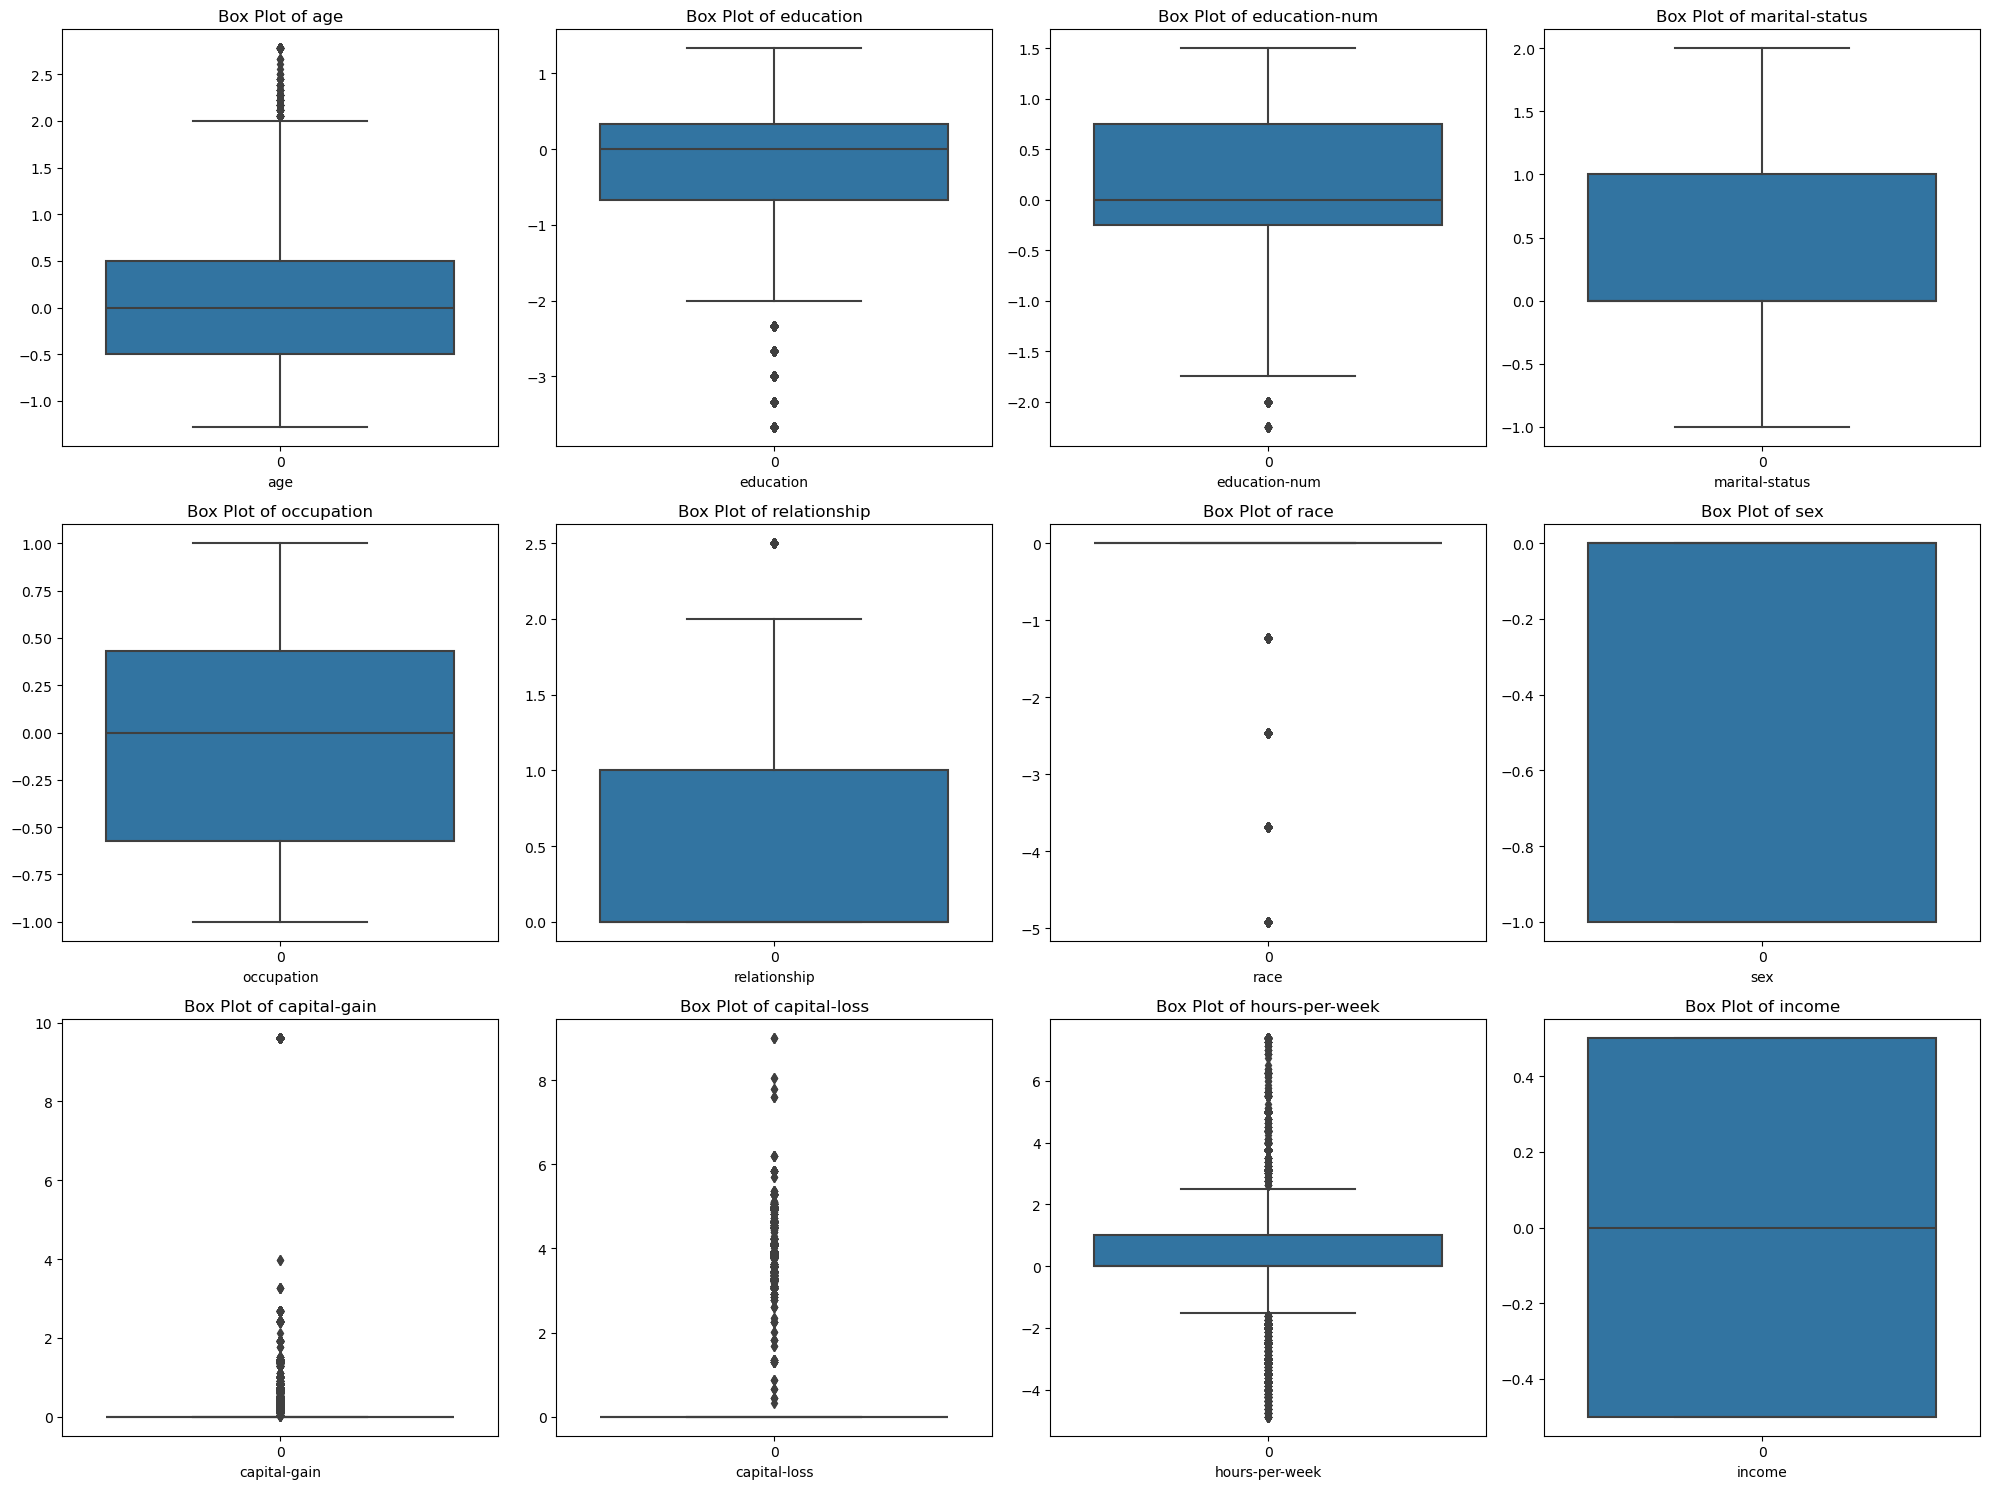

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

features = df_scaled.columns
# Calculate the number of rows required for the grid
num_rows = len(features) // 4 + (len(features) % 4 > 0)
# Create a figure and axes
fig, axes = plt.subplots(num_rows, 4, figsize=(20, num_rows * 5))
# Flatten axes for easy iteration
axes = axes.flatten()
# Plot each feature
for ax, feature in zip(axes, features):
    sns.boxplot(data=df_scaled[feature], ax=ax)
    ax.set_title(f'Box Plot of {feature}')
    ax.set_xlabel(feature)

# Remove unused subplots
for i in range(len(features), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()


### Caping outliers using IQR method.

In [29]:
import pandas as pd
def cap_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return series.clip(lower_bound, upper_bound)

capped_df = df_scaled.apply(cap_outliers)

### After capping Outlier via Box-plot

=========== After capping Outlier via Box-plot ===========


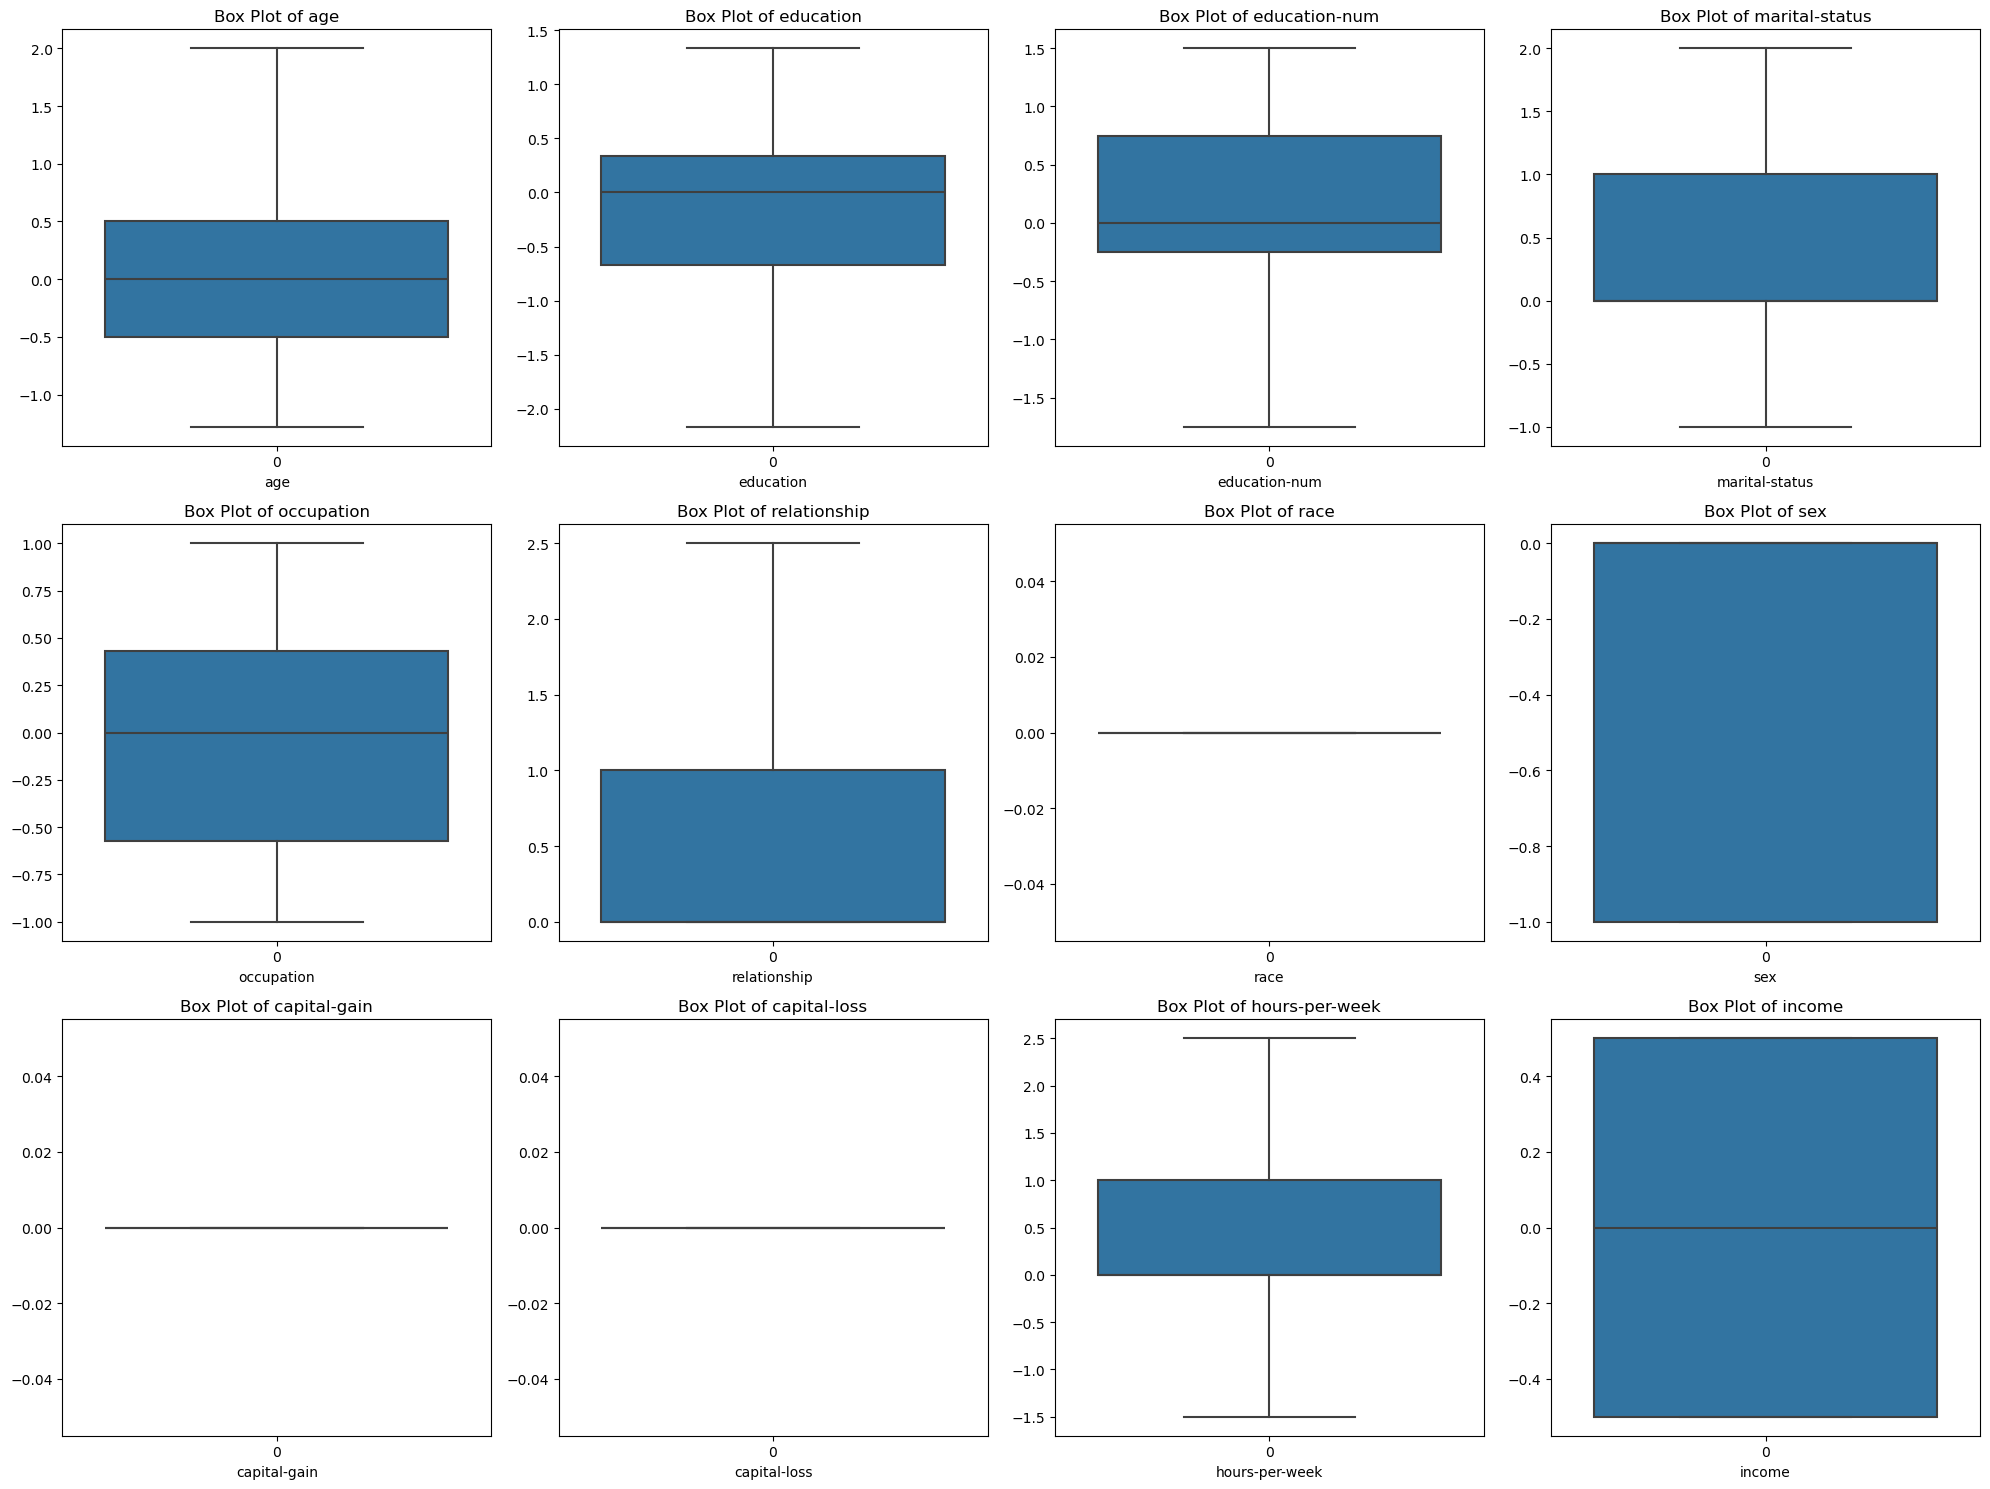

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

features = capped_df.columns
# Calculate the number of rows required for the grid
num_rows = len(features) // 4 + (len(features) % 4 > 0)
# Create a figure and axes
fig, axes = plt.subplots(num_rows, 4, figsize=(20, num_rows * 5))
# Flatten axes for easy iteration
axes = axes.flatten()
# Plot each feature
for ax, feature in zip(axes, features):
    sns.boxplot(data=capped_df[feature], ax=ax)
    ax.set_title(f'Box Plot of {feature}')
    ax.set_xlabel(feature)

# Remove unused subplots
for i in range(len(features), len(axes)):
    fig.delaxes(axes[i])
print("=========== After capping Outlier via Box-plot ===========")
print("=============================================================")
plt.tight_layout()
plt.show()

In [31]:
print(f"{capped_df['income'].value_counts()}")


income
 0.5    24720
-0.5    24720
Name: count, dtype: int64


### income : target feature make it categorical

In [32]:
# Map income values to categorical labels
income_mapping = {0.5: '<=50K', -0.5: '>50K'}
data_cat = capped_df.copy()
###data_cat['income'] = data_cat['income'].map(income_mapping)
data_cat['income'] = data_cat['income'].map(income_mapping).astype('category')

# Confirm the transformation
print(data_cat['income'].value_counts())
print(data_cat['income'].dtype)


income
<=50K    24720
>50K     24720
Name: count, dtype: int64
category


#### Split data and split column with target and independent features

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score
data = data_cat.copy()
# Step 2: Define features and target
X = data.drop(columns=['income'])  # Features
y = data['income']                 # Target

# Step 3: Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


#### Decision Tree for classify target 'income'

In [45]:
# Step 4: Train the decision tree classifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Step 5: Evaluate the model
y_pred = dt_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
report
 

'              precision    recall  f1-score   support\n\n       <=50K       0.82      0.95      0.88      7350\n        >50K       0.94      0.79      0.86      7482\n\n    accuracy                           0.87     14832\n   macro avg       0.88      0.87      0.87     14832\nweighted avg       0.88      0.87      0.87     14832\n'

In [35]:
import pandas as pd
from sklearn.metrics import confusion_matrix

# Assuming y_test and y_pred are your true labels and predicted labels
conf_matrix = confusion_matrix(y_test, y_pred)

# Create a pandas DataFrame for better visualization
conf_matrix_df = pd.DataFrame(conf_matrix, 
                              index=['True <=50K', 'True >50K'], 
                              columns=['Predicted <=50K', 'Predicted >50K'])

print(conf_matrix_df)


            Predicted <=50K  Predicted >50K
True <=50K             6975             375
True >50K              1573            5909


#### Random Forest : Classifier

In [36]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, classification_report, accuracy_score

data = data_cat.copy()
# Step 2: Define features and target
X = data.drop(columns=['income'])  # Features
y = data['income']                 # Target

# Step 3: Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)

# Predict and evaluate the model
y_pred_rf = rf_model.predict(X_test)

# Calculate precision, recall, and accuracy
precision_rf = precision_score(y_test, y_pred_rf, average=None)
recall_rf = recall_score(y_test, y_pred_rf, average=None)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
report_rf = classification_report(y_test, y_pred_rf)

print(f"Accuracy: {accuracy_rf}")
print(f"Precision for each class: {precision_rf}")
print(f"Recall for each class: {recall_rf}")
print("Classification Report:")
print(report_rf)


Accuracy: 0.8801240560949298
Precision for each class: [0.83655472 0.9351541 ]
Recall for each class: [0.94217687 0.819166  ]
Classification Report:
              precision    recall  f1-score   support

       <=50K       0.84      0.94      0.89      7350
        >50K       0.94      0.82      0.87      7482

    accuracy                           0.88     14832
   macro avg       0.89      0.88      0.88     14832
weighted avg       0.89      0.88      0.88     14832



In [89]:
import pandas as pd
from sklearn.metrics import confusion_matrix

# Assuming y_test and y_pred are your true labels and predicted labels
conf_matrix = confusion_matrix(y_test, y_pred_rf)

# Create a pandas DataFrame for better visualization
conf_matrix_df = pd.DataFrame(conf_matrix, 
                              index=['True <=50K', 'True >50K'], 
                              columns=['Predicted <=50K', 'Predicted >50K'])

print(conf_matrix_df)

            Predicted <=50K  Predicted >50K
True <=50K             6925             425
True >50K              1353            6129


### GridsearchCV -hyperparameter tuning with : Random Forest

In [38]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Define the model
print("Define the model")
rf = RandomForestClassifier()
# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt'],
    'bootstrap': [True]
}

print("Start............")
# Implement Grid Search
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy')

print("Starting grid search...")
grid_search.fit(X_train, y_train)
print("Grid search completed.")

# Get the best parameters
best_params = grid_search.best_params_
print(f"Best parameters: {best_params}")

# Use the best parameters to fit the model
best_rf = RandomForestClassifier(**best_params)
best_rf.fit(X_train, y_train)
y_pred = best_rf.predict(X_test)
print("Model fitting and prediction completed.")

# Evaluate the model

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("Classification Report:")
print(classification_report(y_test, y_pred))


Define the model
Start............
Starting grid search...
Grid search completed.
Best parameters: {'bootstrap': True, 'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Model fitting and prediction completed.
Confusion Matrix:
[[6990  360]
 [1411 6071]]
Classification Report:
              precision    recall  f1-score   support

       <=50K       0.83      0.95      0.89      7350
        >50K       0.94      0.81      0.87      7482

    accuracy                           0.88     14832
   macro avg       0.89      0.88      0.88     14832
weighted avg       0.89      0.88      0.88     14832

2222222222222222222


### SVM : Support Vector Machine Classifier

Accuracy: 0.7465614886731392
Classification Report:
              precision    recall  f1-score   support

       <=50K       0.72      0.79      0.76      7350
        >50K       0.77      0.71      0.74      7482

    accuracy                           0.75     14832
   macro avg       0.75      0.75      0.75     14832
weighted avg       0.75      0.75      0.75     14832



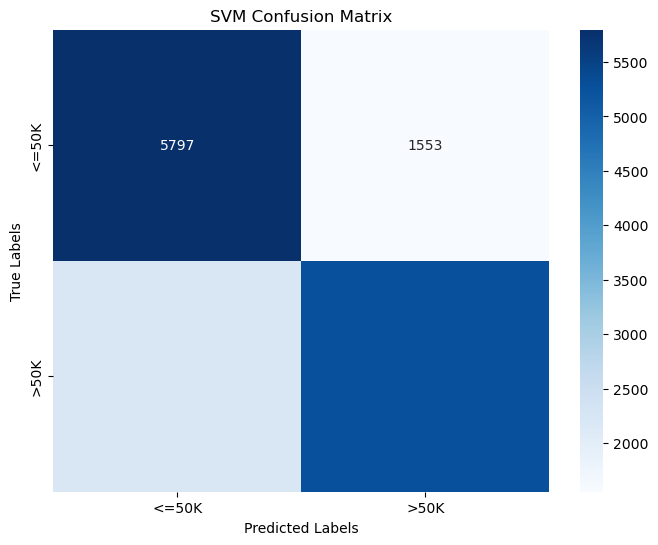

In [40]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Train an SVM classifier
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)

# Predict using the SVM model
y_pred_svm = svm_model.predict(X_test)

# Evaluate the model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
report_svm = classification_report(y_test, y_pred_svm)

print(f"Accuracy: {accuracy_svm}")
print("Classification Report:")
print(report_svm)

# Display the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_svm, annot=True, fmt="d", cmap="Blues", 
            xticklabels=['<=50K', '>50K'], yticklabels=['<=50K', '>50K'])
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("SVM Confusion Matrix")
plt.show()


In [42]:
import pandas as pd
from sklearn.metrics import confusion_matrix

# Assuming y_test and y_pred are your true labels and predicted labels
conf_matrix = confusion_matrix(y_test, y_pred_svm)

# Create a pandas DataFrame for better visualization
conf_matrix_df = pd.DataFrame(conf_matrix, 
                              index=['True <=50K', 'True >50K'], 
                              columns=['Predicted <=50K', 'Predicted >50K'])

print(conf_matrix_df)

            Predicted <=50K  Predicted >50K
True <=50K             5797            1553
True >50K              2206            5276


#### KNN Classifier

Accuracy: 0.8183656957928802
Classification Report:
              precision    recall  f1-score   support

       <=50K       0.78      0.89      0.83      7350
        >50K       0.87      0.75      0.81      7482

    accuracy                           0.82     14832
   macro avg       0.83      0.82      0.82     14832
weighted avg       0.83      0.82      0.82     14832



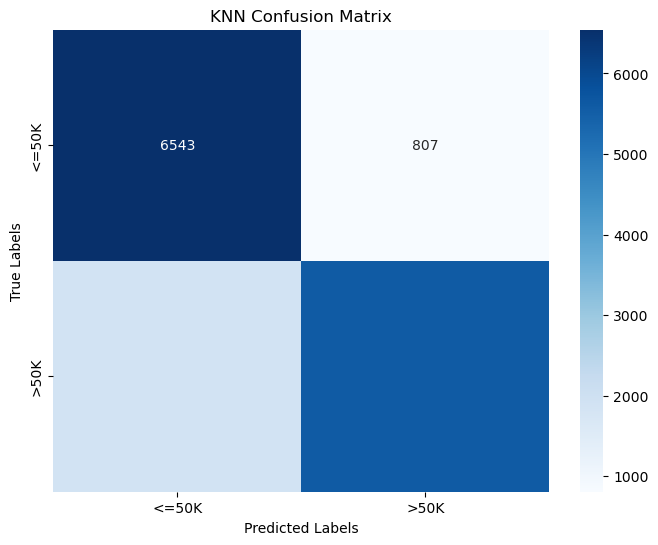

In [43]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Train a KNN classifier
knn_model = KNeighborsClassifier(n_neighbors=5)  # Default n_neighbors=5
knn_model.fit(X_train, y_train)

# Predict using the KNN model
y_pred_knn = knn_model.predict(X_test)

# Evaluate the model
accuracy_knn = accuracy_score(y_test, y_pred_knn)
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
report_knn = classification_report(y_test, y_pred_knn)

print(f"Accuracy: {accuracy_knn}")
print("Classification Report:")
print(report_knn)

# Display the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_knn, annot=True, fmt="d", cmap="Blues", 
            xticklabels=['<=50K', '>50K'], yticklabels=['<=50K', '>50K'])
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("KNN Confusion Matrix")
plt.show()


In [44]:
import pandas as pd
from sklearn.metrics import confusion_matrix

# Assuming y_test and y_pred are your true labels and predicted labels
conf_matrix = confusion_matrix(y_test, y_pred_knn)

# Create a pandas DataFrame for better visualization
conf_matrix_df = pd.DataFrame(conf_matrix, 
                              index=['True <=50K', 'True >50K'], 
                              columns=['Predicted <=50K', 'Predicted >50K'])

print(conf_matrix_df)

            Predicted <=50K  Predicted >50K
True <=50K             6543             807
True >50K              1887            5595


#### XGBoost : Classifier

C:\Users\hp\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [18:23:24] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.8365695792880259
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.89      0.84      7350
           1       0.88      0.78      0.83      7482

    accuracy                           0.84     14832
   macro avg       0.84      0.84      0.84     14832
weighted avg       0.84      0.84      0.84     14832



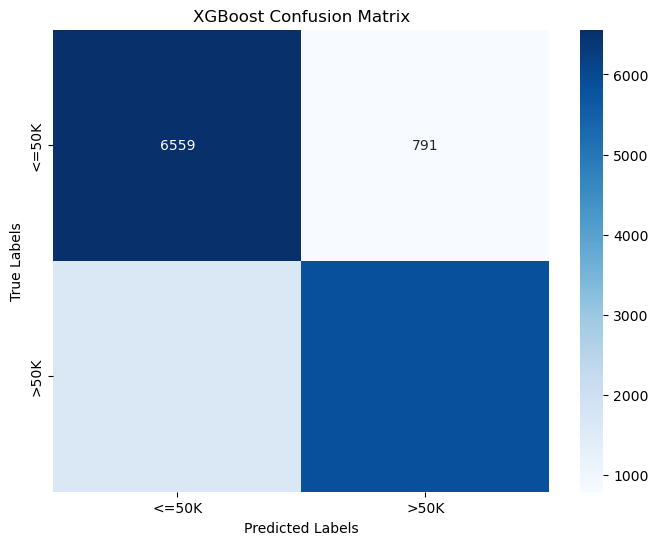

In [48]:
# Map target labels to numeric values
y_train_numeric = y_train.map({'<=50K': 0, '>50K': 1})
y_test_numeric = y_test.map({'<=50K': 0, '>50K': 1})

# Train an XGBoost classifier
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train_numeric)

# Predict using the XGBoost model
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the model
accuracy_xgb = accuracy_score(y_test_numeric, y_pred_xgb)
conf_matrix_xgb = confusion_matrix(y_test_numeric, y_pred_xgb)
report_xgb = classification_report(y_test_numeric, y_pred_xgb)

print(f"Accuracy: {accuracy_xgb}")
print("Classification Report:")
print(report_xgb)

# Display the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_xgb, annot=True, fmt="d", cmap="Blues", 
            xticklabels=['<=50K', '>50K'], yticklabels=['<=50K', '>50K'])
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("XGBoost Confusion Matrix")
plt.show()


#### For 'Income Classification', We have used, Decision Tree, Random Forest, GridsearchCV with Random Forest, XGBoost, SVM and KNN classifier
#### their is Best result from GridSearchCV with Random Forest 84 percision rate and 92 is recall approximate.